<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| MODEL Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">In this notebook will be conducted the <b>EDA</b> in order to understand the data and how those data is related with the School Dropout in Sogamoso, Colombia.</p>

## 1. Libraries

In [1]:
# General
import itertools
from datetime import datetime, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

## Own specific functions 
from functions import *

## 2. Importing files

In [2]:
df_students = pd.read_csv("datasets/df_students.csv")

In [3]:
df_analysis(df_students, key_columns=["PER_ID_ANO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 183550
- Percentage of NaN:			 1.68 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_ANO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
1,INSTITUCION,object,311866,76,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,INSTITUCION_ESPECIALIDAD_NO_APLICA,int64,311866,2,0,0.00000,0.38291,0.00000,0.00000,0.00000,1.00000,1.00000,0.48610
32,INSTITUCION_ESPECIALIDAD_INDUSTRIAL,int64,311866,2,0,0.00000,0.63968,0.00000,0.00000,1.00000,1.00000,1.00000,0.48010
31,INSTITUCION_ESPECIALIDAD_COMERCIAL,int64,311866,2,0,0.00000,0.00878,0.00000,0.00000,0.00000,0.00000,1.00000,0.09327
30,INSTITUCION_ESPECIALIDAD_AGROPECUARIO,int64,311866,2,0,0.00000,0.07492,0.00000,0.00000,0.00000,0.00000,1.00000,0.26327
29,INSTITUCION_ESPECIALIDAD_ACADÉMICA,int64,311866,2,0,0.00000,0.90453,0.00000,1.00000,1.00000,1.00000,1.00000,0.29386
28,INSTITUCION_NIVEL_PRIMERA_INFANCIA,int64,311866,2,0,0.00000,0.10307,0.00000,0.00000,0.00000,0.00000,1.00000,0.30405
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198


## 3. Exploratory Data Analysis

### 3.1 Univariate analysis

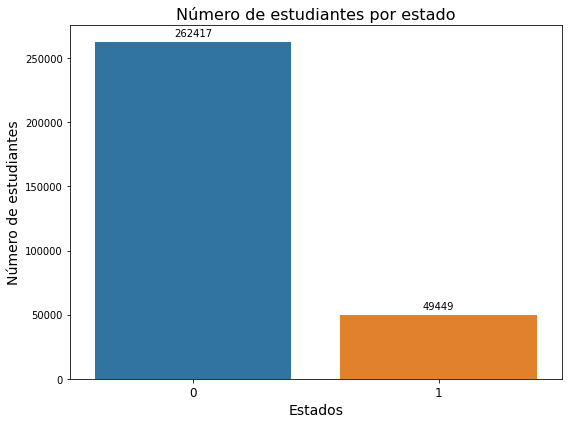

In [145]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plot = sns.barplot(x=df_students["ESTADO"].value_counts(ascending=False).index, 
                   y=df_students["ESTADO"].value_counts(ascending=False))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTADO"].value_counts(ascending=False).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por estado", size=16)
plt.xlabel("Estados", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

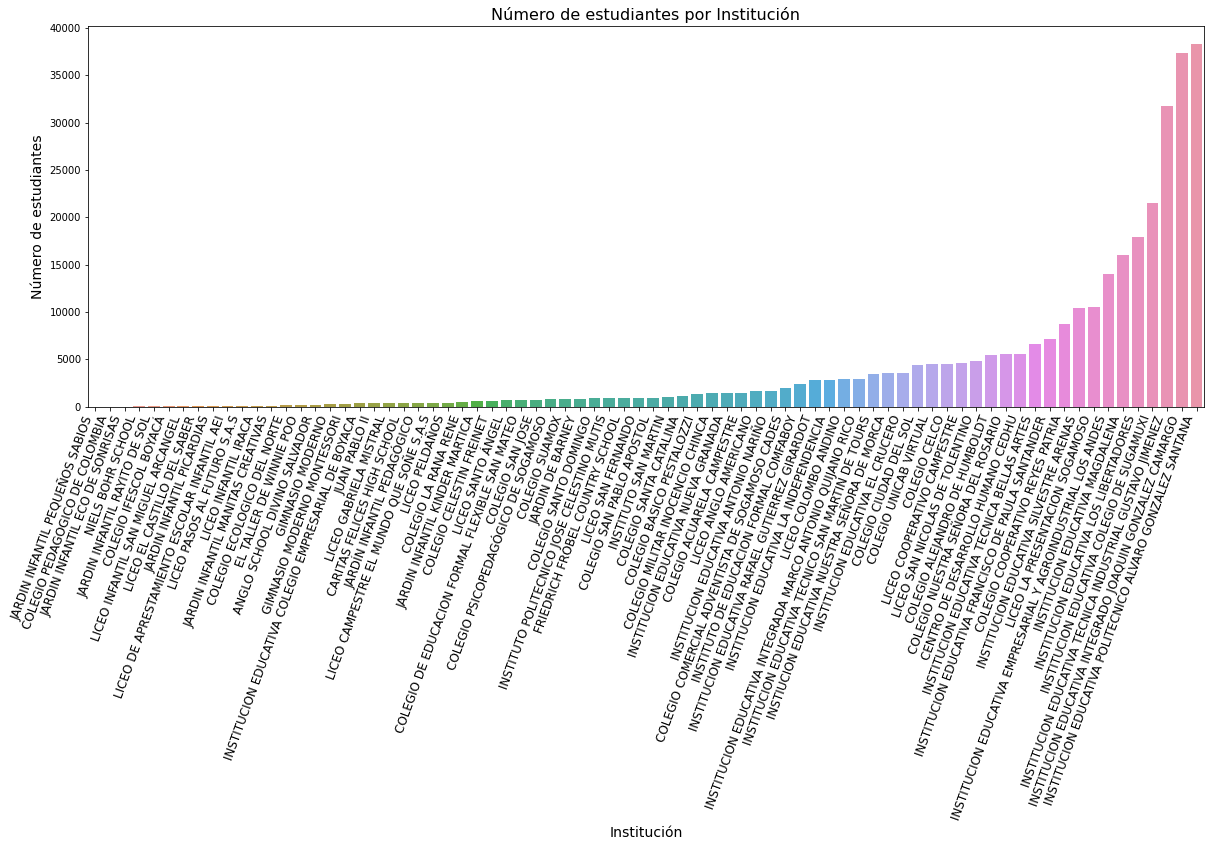

In [5]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x=df_students["INSTITUCION"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION"].value_counts(ascending=True))
plot.set_xticklabels(labels=df_students["INSTITUCION"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

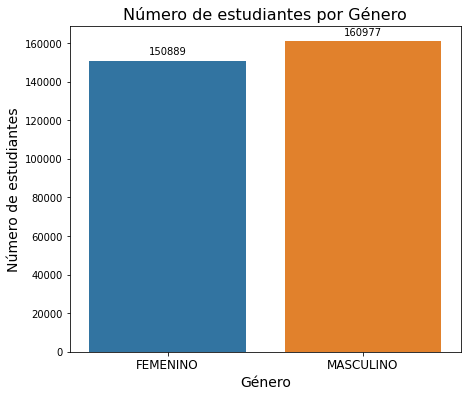

In [144]:
fig, ax1 = plt.subplots(figsize=(7, 6))
plot = sns.barplot(x=df_students["GENERO"].value_counts(ascending=True).index, 
                   y=df_students["GENERO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["GENERO"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

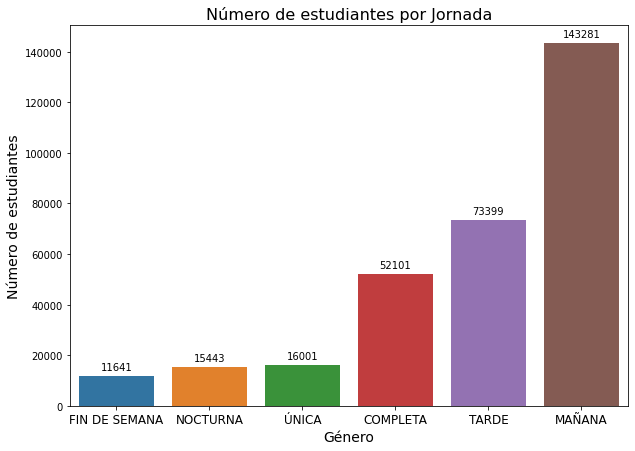

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["JORNADA"].value_counts(ascending=True).index, 
                   y=df_students["JORNADA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["JORNADA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Jornada", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

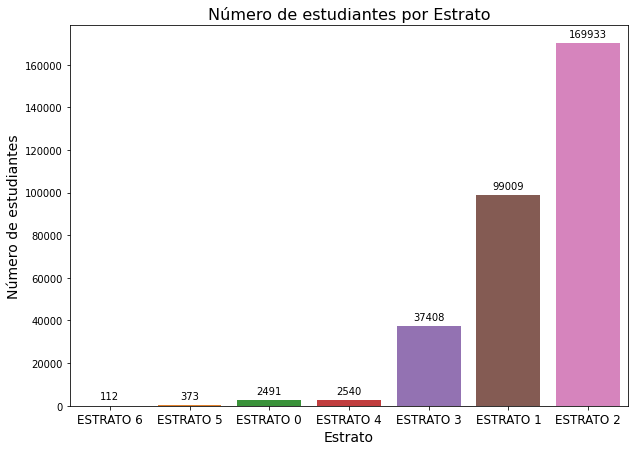

In [142]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["ESTRATO"].value_counts(ascending=True).index, 
                   y=df_students["ESTRATO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTRATO"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

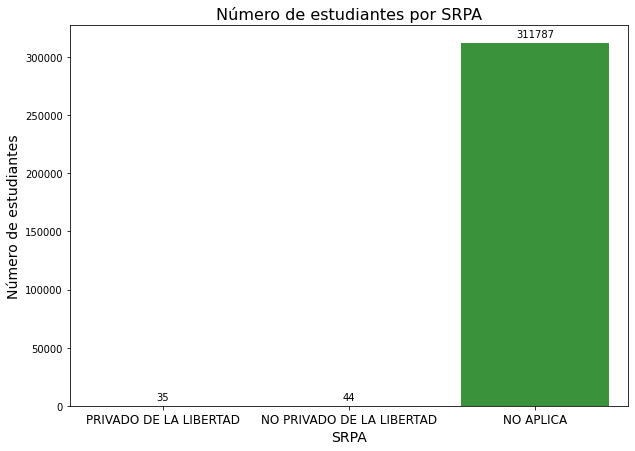

In [135]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["SRPA"].value_counts(ascending=True).index, 
                   y=df_students["SRPA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["SRPA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por SRPA", size=16)
plt.xlabel("SRPA", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

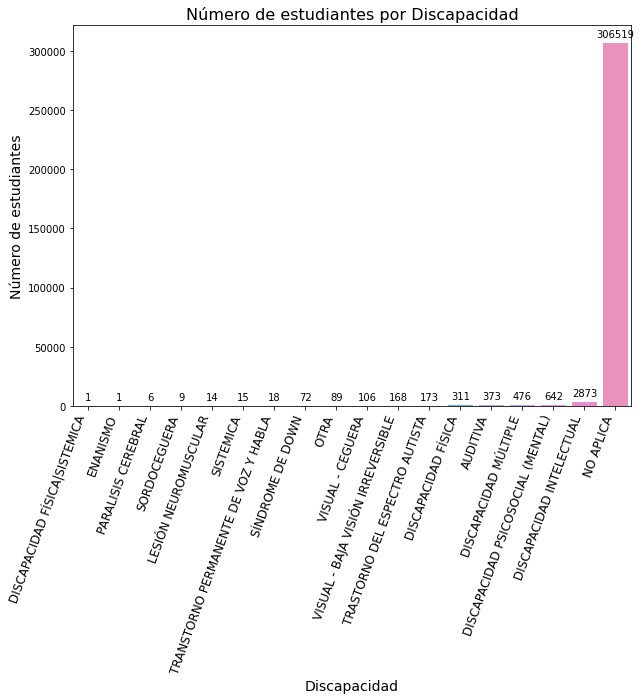

In [110]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["DISCAPACIDAD"].value_counts(ascending=True).index, 
                   y=df_students["DISCAPACIDAD"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["DISCAPACIDAD"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Discapacidad", size=16)
plt.xlabel("Discapacidad", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

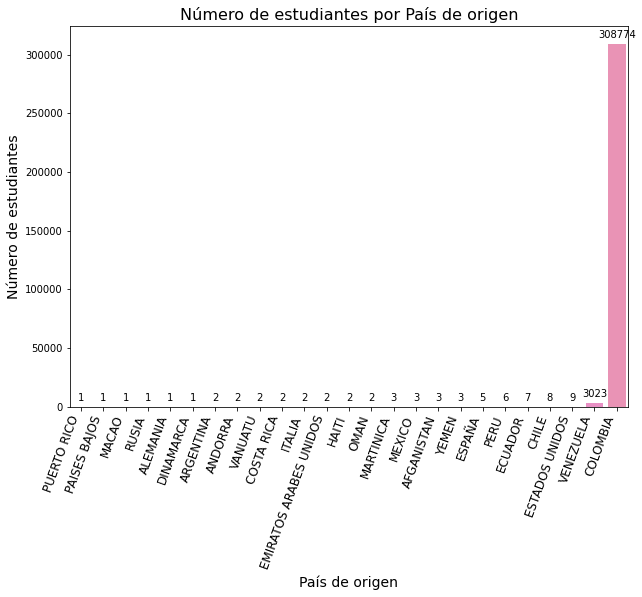

In [111]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index, 
                   y=df_students["PAIS_ORIGEN"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

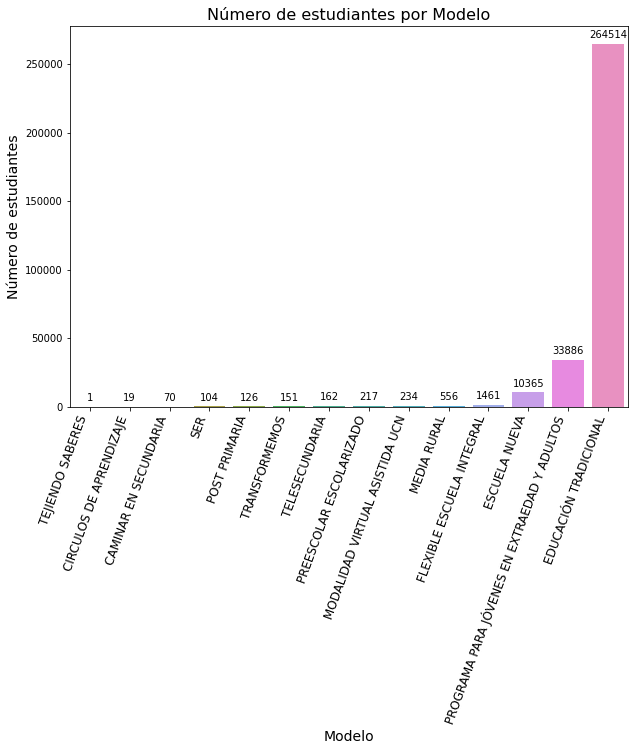

In [115]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_MODELO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

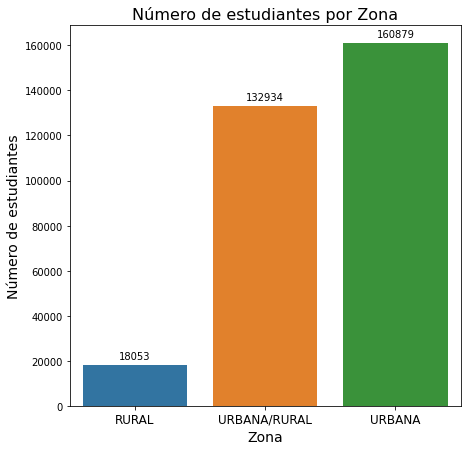

In [136]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_ZONA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

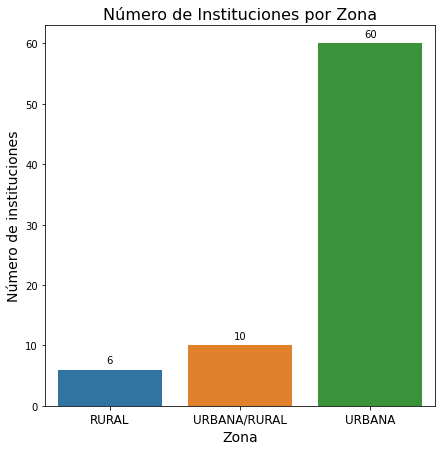

In [137]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_ZONA")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_ZONA")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_ZONA"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de Instituciones por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

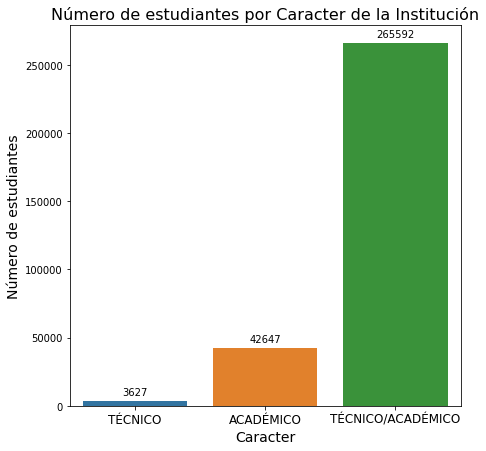

In [138]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por Caracter de la Institución", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.show()

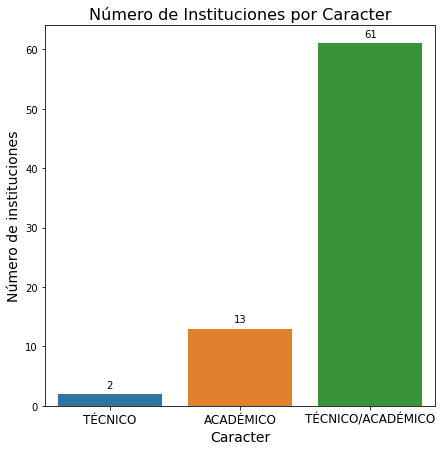

In [139]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     size=12, horizontalalignment="center")
plt.title("Número de Instituciones por Caracter", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

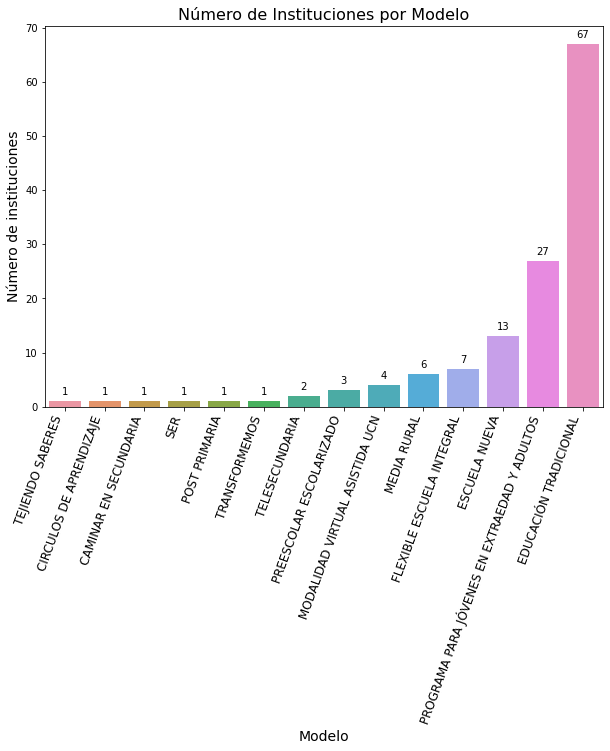

In [141]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_MODELO")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_MODELO")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de Instituciones por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

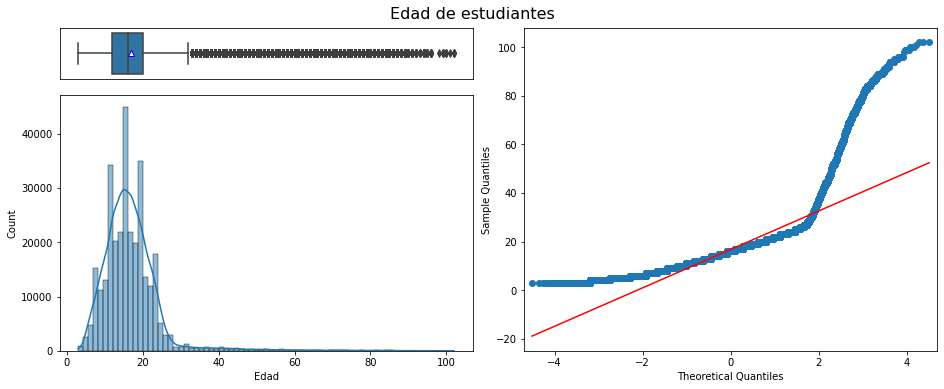

In [21]:
fig = plt.figure(constrained_layout=True, figsize=[13,5])
fig.suptitle("Edad de estudiantes", size=16, y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_students, x=df_students["EDAD"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_students, x=df_students["EDAD"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Edad")

# QQplot
qqplot(df_students["EDAD"], line="s", ax=ax_qqplot)

plt.show()

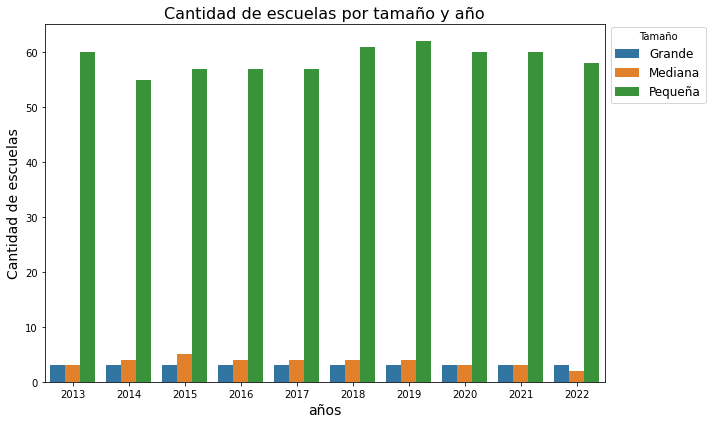

In [101]:
df_temp = pd.DataFrame(df_students.groupby(["ANO", 
                                            "INSTITUCION_TAMAÑO"])["INSTITUCION"].nunique()).reset_index()

df_temp.rename(columns={"ANO" : "Año",
                        "INSTITUCION_TAMAÑO" : "Tamaño",
                        "INSTITUCION" : "Total"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Año", y="Total", hue="Tamaño", data=df_temp)
plt.title("Cantidad de escuelas por tamaño y año", fontsize=16)
plt.xlabel("años", size=14)
plt.ylabel("Cantidad de escuelas", size=14)
plt.legend(bbox_to_anchor=(1, 1.01), loc="upper left", prop={"size": 12},
           title="Tamaño")
plt.tight_layout()
plt.show()

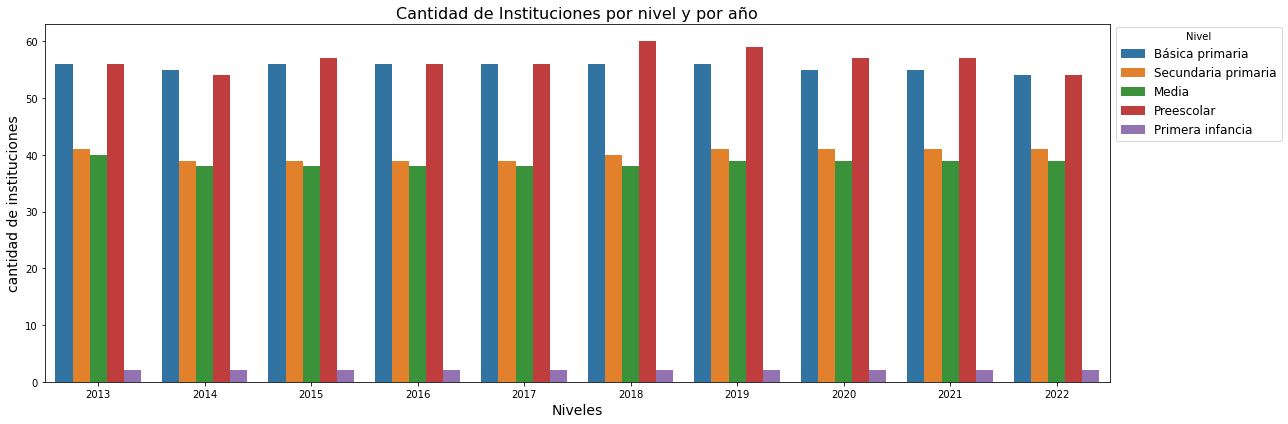

In [246]:
NIVEL = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", 
    "INSTITUCION_NIVEL_MEDIA", "INSTITUCION_NIVEL_PREESCOLAR", 
    "INSTITUCION_NIVEL_PRIMERA_INFANCIA",
]

df_schools = pd.DataFrame()

for column in NIVEL:

    # making a bool series
    bool_series = df_students[["ANO", "INSTITUCION", column]].duplicated(keep="last")

    # passing NOT of bool series to see unique values only
    df_temp = df_students[~bool_series].copy()

    # Grouping and counting by number of school by year and variable
    df_temp = df_temp.groupby("ANO").agg({ column : "sum" }).reset_index()

    # df_schools = df_schools.merge(df_temp, on="ANO", how="left")
    df_schools = pd.concat([df_schools, df_temp], axis=1)
    
df_schools = df_schools.loc[:, ~df_schools.columns.duplicated()].copy()

df_schools = df_schools.melt(id_vars="ANO").rename(columns=str.title)

LABELS = ["Básica primaria", "Secundaria primaria",
          "Media", "Preescolar", "Primera infancia"]

plt.figure(figsize=(18, 6))

ax = sns.barplot(x="Ano", y="Value", hue="Variable", 
                 data=df_schools)

h, l = ax.get_legend_handles_labels()
ax.legend(h, LABELS, bbox_to_anchor=(1, 1.01), 
          loc="upper left", prop={"size": 12},
          title="Nivel")
plt.title("Cantidad de Instituciones por nivel y por año", fontsize=16)
plt.xlabel("Niveles", size=14)
plt.ylabel("cantidad de instituciones", size=14)
plt.tight_layout()
plt.show()

In [248]:
df_students.columns

Index(['ANO', 'INSTITUCION', 'PER_ID_ANO', 'PER_ID', 'EDAD', 'GENERO',
       'GRADO_COD', 'JORNADA', 'ESTADO', 'ESTRATO', 'PAIS_ORIGEN',
       'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR', 'INSTITUCION_MODELO',
       'INSTITUCION_APOYO_ACADEMICO_ESPECIAL', 'INSTITUCION_ZONA',
       'INSTITUCION_CARACTER', 'INSTITUCION_NUMERO_DE_SEDES',
       'INSTITUCION_ESTADO', 'INSTITUCION_LATITUDE', 'INSTITUCION_LONGITUD',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

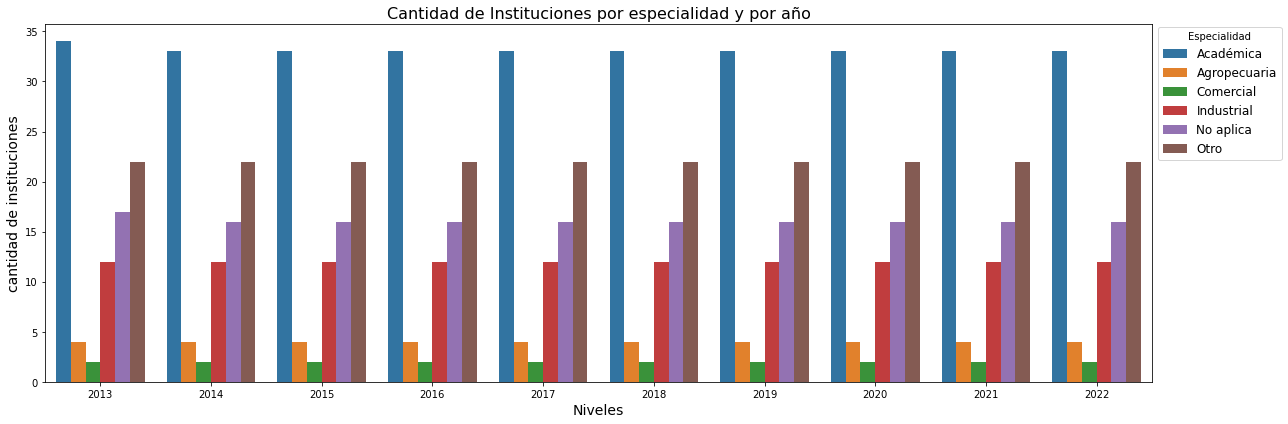

In [251]:
ESPECIALIDAD = [
    "INSTITUCION_ESPECIALIDAD_ACADÉMICA", "INSTITUCION_ESPECIALIDAD_AGROPECUARIO",
    "INSTITUCION_ESPECIALIDAD_COMERCIAL", "INSTITUCION_ESPECIALIDAD_INDUSTRIAL",
    "INSTITUCION_ESPECIALIDAD_NO_APLICA", "INSTITUCION_ESPECIALIDAD_OTRO"
]

df_schools = pd.DataFrame()

for column in ESPECIALIDAD:

    # making a bool series
    bool_series = df_students[["ANO", "INSTITUCION", column]].duplicated(keep="last")

    # passing NOT of bool series to see unique values only
    df_temp = df_students[~bool_series].copy()

    # Grouping and counting by number of school by year and variable
    df_temp = df_temp.groupby("ANO").agg({ column : "sum" }).reset_index()

    # df_schools = df_schools.merge(df_temp, on="ANO", how="left")
    df_schools = pd.concat([df_schools, df_temp], axis=1)
    
df_schools = df_schools.loc[:, ~df_schools.columns.duplicated()].copy()

df_schools = df_schools.melt(id_vars="ANO").rename(columns=str.title)

LABELS = ["Académica", "Agropecuaria", "Comercial",
          "Industrial", "No aplica", "Otro"]

plt.figure(figsize=(18, 6))

ax = sns.barplot(x="Ano", y="Value", hue="Variable", 
                 data=df_schools)

h, l = ax.get_legend_handles_labels()
ax.legend(h, LABELS, bbox_to_anchor=(1, 1.01), 
          loc="upper left", prop={"size": 12},
          title="Especialidad")
plt.title("Cantidad de Instituciones por especialidad y por año", fontsize=16)
plt.xlabel("Niveles", size=14)
plt.ylabel("cantidad de instituciones", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
    <p><h1>FLAG</h1></p>
</div>

### 3.2 Bivariate analysis

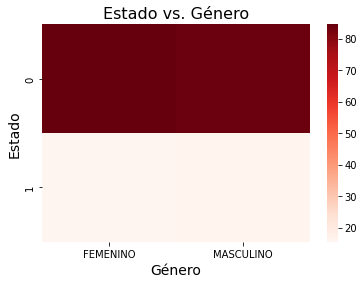

In [252]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["GENERO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Estado", size=14)
plt.show()

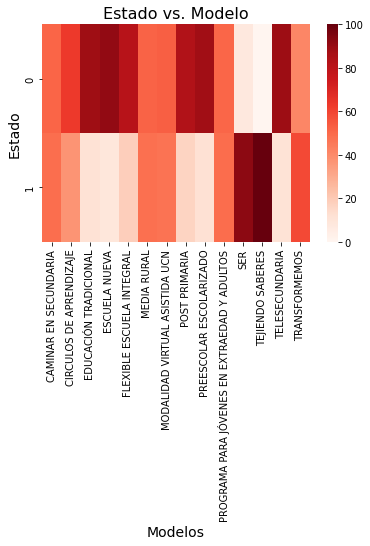

In [254]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_MODELO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Modelo", size=16)
plt.xlabel("Modelos", size=14)
plt.ylabel("Estado", size=14)
plt.show()

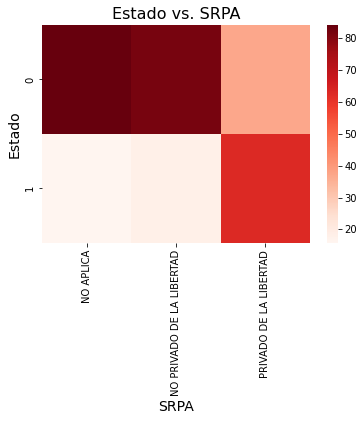

In [255]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["SRPA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. SRPA", size=16)
plt.xlabel("SRPA", size=14)
plt.ylabel("Estado", size=14)
plt.show()

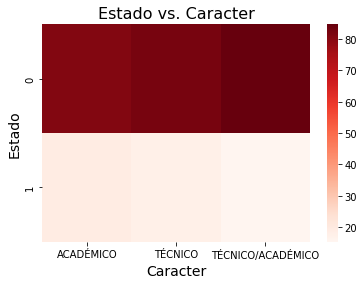

In [256]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_CARACTER"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Caracter", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Estado", size=14)
plt.show()

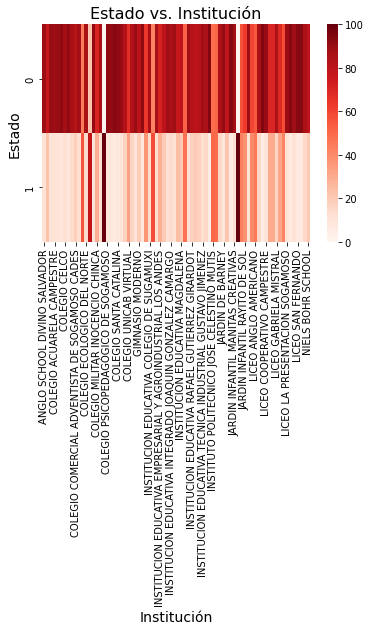

In [257]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Estado", size=14)
plt.show()

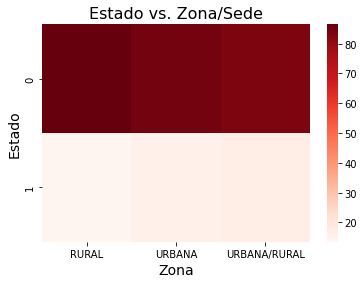

In [258]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_ZONA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Zona/Sede", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Estado", size=14)
plt.show()

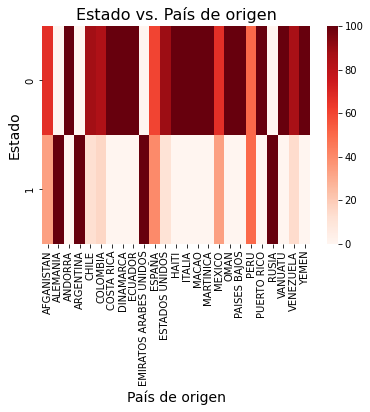

In [260]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["PAIS_ORIGEN"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Estado", size=14)
plt.show()

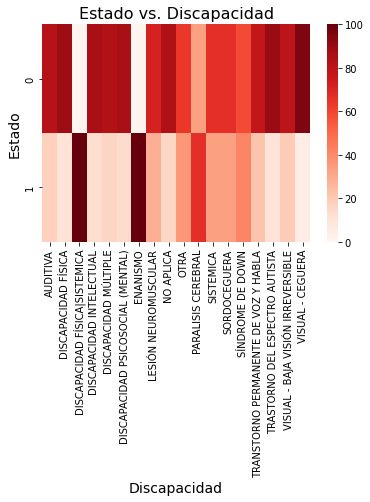

In [259]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["DISCAPACIDAD"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Discapacidad", size=16)
plt.xlabel("Discapacidad", size=14)
plt.ylabel("Estado", size=14)
plt.show()

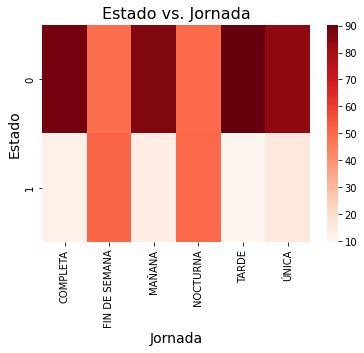

In [261]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["JORNADA"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Jornada", size=16)
plt.xlabel("Jornada", size=14)
plt.ylabel("Estado", size=14)
plt.show()

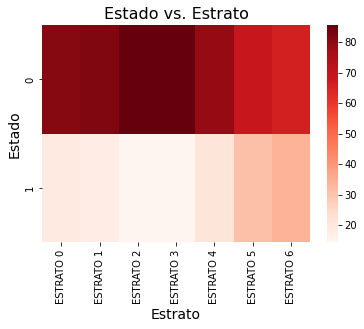

In [262]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["ESTRATO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Estado", size=14)
plt.show()

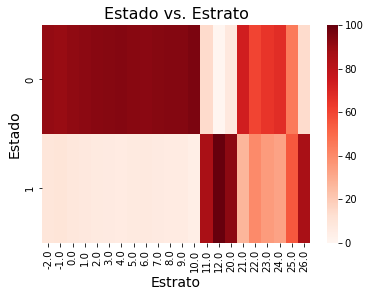

In [263]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["GRADO_COD"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Estado", size=14)
plt.show()

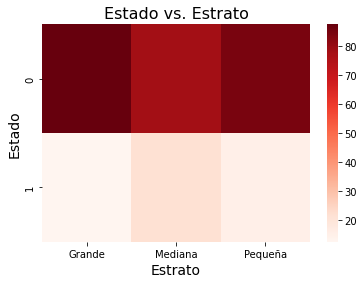

In [264]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION_TAMAÑO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Estado", size=14)
plt.show()